# Import modules

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np
from scipy.stats import sem
from statsmodels.graphics.gofplots import qqplot
from pingouin import pairwise_tukey

## Read in dataframe containing the fusion efficiency data

In [7]:
df_path = input("input path to .xlsx file containing fusion efficiency data: ")

df = pd.read_excel(df_path)

# Extract the column names
group_column = df.columns[0]
values_column = df.columns[-1]

input path to .xlsx file containing fusion efficiency data: /Users/steinar/Documents/Data/4 - cell vs. endosomal membrane in fusion/2 - fusion with PMV/4 - liposomes and PMV content mixing by FT Calcein incorporation/reanalysed data with trace type classification (P4E25T1 and P4E25T2)/dequenching efficiency/compiled efficiency.xlsx


## Perform One-Way ANOVA and Post-Hoc test

In [3]:
#One-way ANOVA
formula = f'{values_column} ~ {group_column}'
model = ols(formula, data=df).fit()
anova_table = anova_lm(model)
print('\nANOVA Table:')
print(anova_table)

#Tukey's HSD post hoc test
tukey_results = pairwise_tukeyhsd(df[values_column], df[group_column])
print('\nTukey\'s HSD Post Hoc Test:')
print(tukey_results)


ANOVA Table:
                df     sum_sq   mean_sq          F        PR(>F)
vesicle_type   3.0  14.947308  4.982436  41.344028  1.723344e-07
Residual      15.0   1.807674  0.120512        NaN           NaN

Tukey's HSD Post Hoc Test:
                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                   group2          meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------
      IAV + BMP liposome                IAV + PMV   -2.186    0.0 -2.8318 -1.5402   True
      IAV + BMP liposome IAV + PMV + 50 mol % BMP  -2.3306    0.0 -3.0018 -1.6594   True
      IAV + BMP liposome   IAV + control liposome  -1.5771 0.0001 -2.2846 -0.8696   True
               IAV + PMV IAV + PMV + 50 mol % BMP  -0.1446 0.9001 -0.7505  0.4612  False
               IAV + PMV   IAV + control liposome   0.6089 0.0679 -0.0369  1.2547  False
IAV + PMV + 50 mol % BMP   IAV + control liposome  

In [4]:
# Perform Tukey's HSD test with unbalanced data
result = pairwise_tukey(data=df, dv=values_column, between=group_column)

# Display only columns 'A', 'B', and 'p-tukey'
result_subset = result[['A', 'B', 'p-tukey']]
print(result_subset)

                          A                         B       p-tukey
0        IAV + BMP liposome                 IAV + PMV  3.795763e-07
1        IAV + BMP liposome  IAV + PMV + 50 mol % BMP  2.716981e-07
2        IAV + BMP liposome    IAV + control liposome  6.093246e-05
3                 IAV + PMV  IAV + PMV + 50 mol % BMP  9.001050e-01
4                 IAV + PMV    IAV + control liposome  6.791416e-02
5  IAV + PMV + 50 mol % BMP    IAV + control liposome  2.545868e-02


## Plot barplot of data and save as .pdf

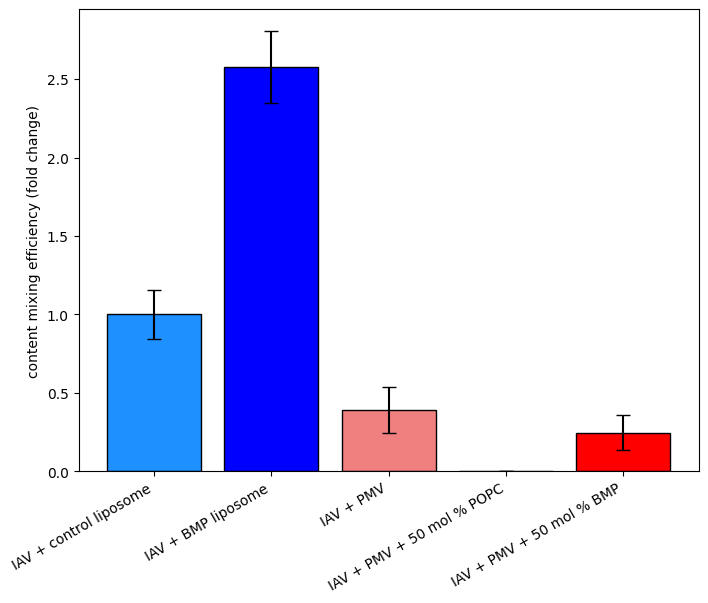

In [10]:
# Calculate mean and standard error for each group
group_means = df.groupby(group_column, sort=False)[values_column].mean()
group_sem = df.groupby(group_column, sort=False)[values_column].apply(sem)

# Define a color scheme for each dataset
colors = ['dodgerblue', 'blue', 'lightcoral', 'tomato','red', 'grey', 'grey', 'grey']

# Create a barplot with pyplot
groups = group_means.index
means = group_means.values
errors = group_sem.values

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(groups, means, yerr=errors, capsize=5, color=colors, edgecolor='black')
plt.xticks(rotation=30, ha='right')
plt.ylabel('content mixing efficiency (fold change)')

# add annotations for significant differences
#plt.hlines(6, xmin=0, xmax=3, color = 'black')
#plt.vlines(1.5, ymin=6, ymax=11.5, color = 'black')
#plt.hlines(11.5, xmin=1.5, xmax=4, color = 'black')
#plt.annotate(text = "***", xy = (2.60,11.5), size = 28)
#plt.vlines(4, ymin=11, ymax=11.5, color = 'black')

# Save the figure as a PDF file
folder = '/Users/steinar/Desktop'
filename = '/efficiency plot.pdf'
plt.savefig(folder + filename, format='pdf', bbox_inches = 'tight')

# Show the plot
plt.show()

## Assumptions for a one-way ANOVA


Levene's test for homogeneity of variances: Statistic=0.1449, p-value=0.9314


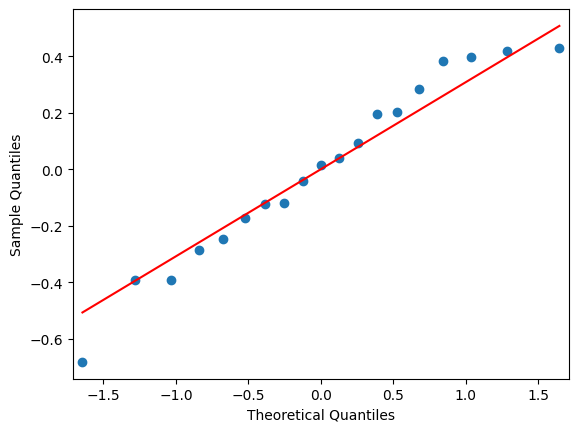

In [6]:
# Levene's test for homogeneity of variances
stat, p_value = levene(*[group_data for _, group_data in df.groupby(group_column)[values_column]])
print(f'\nLevene\'s test for homogeneity of variances: Statistic={stat:.4f}, p-value={p_value:.4f}')

# QQ plot of residuals
qqplot(model.resid, line='s')
plt.show()